In [ ]:


#s1 = load_data('/home/nazarov/07-competitions/04-Paribas/sub/2ndnbxgbtest.csv')
#s2 = load_data('/home/nazarov/07-competitions/04-Paribas/sub/bnp-xgb-ks11.csv')
#s3 = load_data('/home/nazarov/07-competitions/04-Paribas/sub/extra_trees.csv')
#s4 = load_data('/home/nazarov/07-competitions/04-Paribas/sub/H2O_GBM.csv')
#s5 = load_data('/home/nazarov/07-competitions/04-Paribas/sub/H2O_GBM_R.csv')
#s6 = load_data('/home/nazarov/07-competitions/04-Paribas/sub/NNbench.csv')
#s7 = load_data('/home/nazarov/07-competitions/04-Paribas/sub/ordinalxgbtest.csv')
#s8 = load_data('/home/nazarov/07-competitions/04-Paribas/sub/random_forest_benchmark.csv')
#s9 = load_data('/home/nazarov/07-competitions/04-Paribas/sub/rxgb.csv')
#s10 = load_data('/home/nazarov/07-competitions/04-Paribas/sub/simpleblend.csv')
#s11 = load_data('/home/nazarov/07-competitions/04-Paribas/sub/simple_sgd_result.csv')
#s12 = load_data('/home/nazarov/07-competitions/04-Paribas/sub/submission.csv')
#s13 = load_data('/home/nazarov/07-competitions/04-Paribas/sub/tenzorflow.csv')
#s14 = load_data('/home/nazarov/07-competitions/04-Paribas/sub/XGB_200_0.01_11_0.96_0.45_1_1_0.49569_20160315T141042.csv')



In [1]:
import glob
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
path =r'/home/nazarov/07-competitions/02/sub/' # use your path
allFiles = glob.glob(path + "/*.csv")

frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col='ID', header=0)
   # print (df.shape)
    #df.drop(['ID'], axis=1, inplace=True)
    
    list_.append(df)
    
frame = pd.concat(list_, axis=1)
#frame.shape
frame.columns = ['s1', 's2','s3','s4','s5']

Populating the interactive namespace from numpy and matplotlib


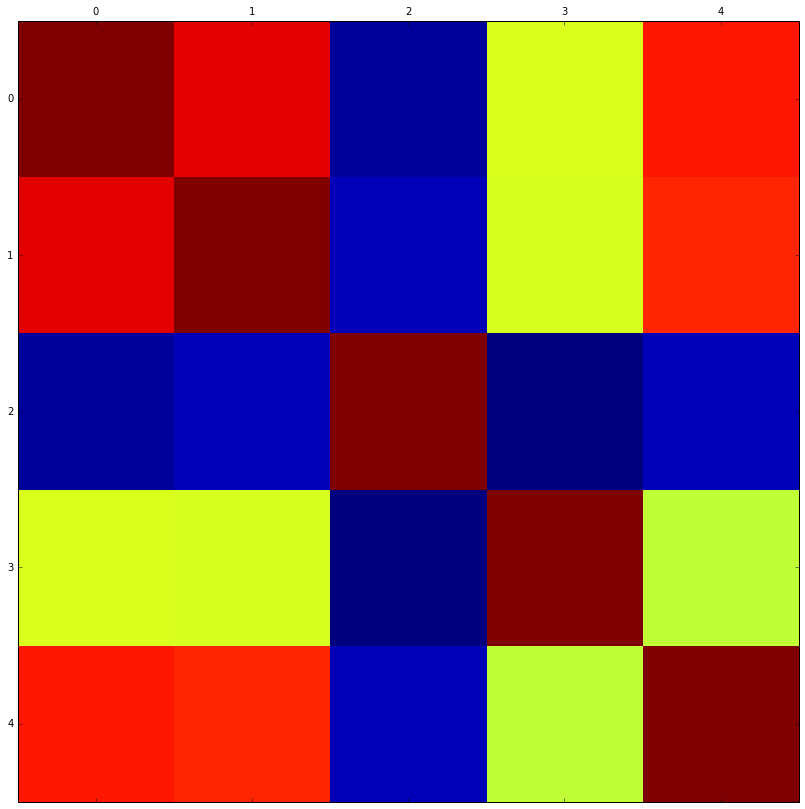

In [2]:
    %pylab inline
    import matplotlib.pyplot as plt
    threshold = 0
    corr = frame.corr()
    corr[corr<threshold] = np.nan
    fig, ax = plt.subplots(figsize=(14, 14))
    ax.matshow(corr)

In [5]:
corr = frame.corr()
threshold = 1
corr[corr>threshold] = np.nan
corr 

,s1,s2,s3,s4,s5
s1,1.000000,0.922108,0.139560,0.661546,0.899470
s2,0.922108,1.000000,0.159062,0.657986,0.884766
s3,0.139560,0.159062,1.000000,0.116127,0.159970
s4,0.661546,0.657986,0.116127,1.000000,0.632277
s5,0.899470,0.884766,0.159970,0.632277,1.000000


In [76]:
'''
from __future__ import division
from collections import defaultdict
#from glob import glob
import glob
import sys

path =r'/home/nazarov/07-competitions/04-Paribas/sub/' # use your path
glob_files = glob.glob(path + "/*.csv")
loc_outfile = '/home/nazarov/07-competitions/04-Paribas/result.csv'
#glob_files = sys.argv[1]
#print (glob_files)
#loc_outfile = sys.argv[2]

def kaggle_bag(glob_files, loc_outfile):
  with open(loc_outfile,"wb") as outfile:
    all_ranks = defaultdict(list)
    for i, glob_file in enumerate( glob(glob_files) ):
      file_ranks = []
      print ("parsing:", glob_file)
      # sort glob_file by first column, ignoring the first line
      lines = open(glob_file).readlines()
      lines = [lines[0]] + sorted(lines[1:])
      for e, line in enumerate( lines ):
        if e == 0 and i == 0:
          outfile.write( line )
        elif e > 0:
          r = line.strip().split(",")
          file_ranks.append( (float(r[1]), e, r[0]) )
      for rank, item in enumerate( sorted(file_ranks) ):
        all_ranks[(item[1],item[2])].append(rank)
    average_ranks = []
    for k in sorted(all_ranks):
      average_ranks.append((sum(all_ranks[k])/len(all_ranks[k]),k))
    ranked_ranks = []
    for rank, k in enumerate(sorted(average_ranks)):
      ranked_ranks.append((k[1][0],k[1][1],rank/(len(average_ranks)-1)))
    for k in sorted(ranked_ranks):
      outfile.write("%s,%s\n"%(k[1],k[2]))
    print("wrote to %s"%loc_outfile)

#kaggle_bag(glob_files, loc_outfile)
'''

# Simple avereging

In [40]:
#frame.drop(['s11'], axes=1, inplace=True)


In [6]:
av_res =pd.DataFrame(frame.mean(axis=1))
#av_res.shape
type(av_res)

pandas.core.frame.DataFrame

In [9]:
submission = pd.DataFrame({"ID": av_res.index,  "TARGET": av_res.icol(0)})
#av_res[av_res.columns[0]]
#av_res.icol(0)
submission.to_csv("/home/nazarov/07-competitions/02/simple_aver.csv", index=False)

/home/nazarov/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: icol(i) is deprecated. Please use .iloc[:,i]
  if __name__ == '__main__':


## Only uncorr predictions with threshold = 0.5

In [89]:
import pandas as pd
from sklearn.decomposition import FactorAnalysis

factor = FactorAnalysis(n_components=7,  random_state=101).fit(frame)

#print (pd.DataFrame(factor.components_,columns=frame))
 


/home/nazarov/anaconda3/lib/python3.5/site-packages/sklearn/decomposition/factor_analysis.py:224: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)


In [90]:
print (pd.DataFrame(factor.components_,columns=frame.columns))

         s1        s2        s3        s4        s5        s6        s7  \
0 -0.080933 -0.134299 -0.138152 -0.121410 -0.096908 -0.001647 -0.170711   
1 -0.017212 -0.042875  0.017948 -0.096703  0.001587  0.000165  0.023820   
2  0.009659  0.004453  0.012566 -0.014064  0.005183 -0.000018 -0.058913   
3  0.009970 -0.008104  0.014085  0.008419 -0.006389 -0.000253  0.003981   
4  0.049901  0.033478  0.016249 -0.010641 -0.002812 -0.000094  0.001016   
5  0.009576  0.010766 -0.037967 -0.005540  0.005109 -0.000065  0.002713   
6  0.033245 -0.006536 -0.002236  0.002289 -0.001633  0.000213  0.000660   

         s8        s9       s10       s12       s13       s14  
0 -0.017000 -0.160768 -0.110519 -0.136030 -0.103659 -0.094644  
1  0.006550  0.011472  0.010854 -0.001788 -0.008369  0.002446  
2  0.004349  0.009081  0.017958 -0.006313  0.012322  0.007214  
3 -0.003189 -0.011302  0.017166  0.022788 -0.001835 -0.007199  
4  0.028659  0.003435 -0.002597  0.006545  0.003003 -0.002818  
5  0.003892 -0.

In [17]:
uncorr_df = frame[['s1','s2','s3']]

av_res_3 =pd.DataFrame(uncorr_df.mean(axis=1))


submission = pd.DataFrame({"ID": av_res_3.index,  "TARGET": av_res_3.iloc[:,0]})
#av_res[av_res.columns[0]]
#av_res.icol(0)
submission.to_csv("/home/nazarov/07-competitions/02/simple_aver_3.csv", index=False)


In [28]:
'''
from collections import defaultdict
from glob import glob
import sys

glob_files = sys.argv[1]
loc_outfile = sys.argv[2]

def kaggle_bag(glob_files, loc_outfile, method="average", weights="uniform"):
  if method == "average":
    scores = defaultdict(float)
  with open(loc_outfile,"wb") as outfile:
    for i, glob_file in enumerate( glob(glob_files) ):
      print ("parsing:", glob_file)
      # sort glob_file by first column, ignoring the first line
      lines = open(glob_file).readlines()
      lines = [lines[0]] + sorted(lines[1:])
      for e, line in enumerate( lines ):
        if i == 0 and e == 0:
          outfile.write(line)
        if e > 0:
          row = line.strip().split(",")
          scores[(e,row[0])] += float(row[1])
    for j,k in sorted(scores):
      outfile.write("%s,%f\n"%(k,scores[(j,k)]/(i+1)))
    print("wrote to %s"%loc_outfile)

#kaggle_bag(glob_files, loc_outfile)
'''

# Geom avereging

In [10]:
from scipy.stats import gmean


geom_av_res =pd.DataFrame(gmean(frame, axis=1))
geom_av_res.index = frame.index

submission = pd.DataFrame({"ID": geom_av_res.index,  "TARGET": geom_av_res.iloc[:,0]})
#av_res[av_res.columns[0]]
#av_res.icol(0)
submission.to_csv("/home/nazarov/07-competitions/02/geom_av_res.csv", index=False)


In [11]:
geom_av_res.describe()

,0
count,75818.000000
mean,0.055859
std,0.075030
min,0.000000
25%,0.008986
50%,0.028279
75%,0.061362
max,0.862064


In [ ]:
'''
from __future__ import division
from collections import defaultdict
from glob import glob
import sys
import math

glob_files = sys.argv[1]
loc_outfile = sys.argv[2]

def kaggle_bag(glob_files, loc_outfile, method="average", weights="uniform"):
  if method == "average":
    scores = defaultdict(float)
  with open(loc_outfile,"wb") as outfile:
    for i, glob_file in enumerate( glob(glob_files) ):
      print "parsing:", glob_file
      # sort glob_file by first column, ignoring the first line
      lines = open(glob_file).readlines()
      lines = [lines[0]] + sorted(lines[1:])
      for e, line in enumerate( lines ):
        if i == 0 and e == 0:
          outfile.write(line)
        if e > 0:
          row = line.strip().split(",")
          if scores[(e,row[0])] == 0:
            scores[(e,row[0])] = 1
          scores[(e,row[0])] *= float(row[1])
    for j,k in sorted(scores):
      outfile.write("%s,%f\n"%(k,math.pow(scores[(j,k)],1/(i+1))))
    print("wrote to %s"%loc_outfile)

#kaggle_bag(glob_files, loc_outfile)
'''


# Only good prediction

In [111]:
import glob
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
path =r'/home/nazarov/07-competitions/04-Paribas/sub2/' # use your path
allFiles = glob.glob(path + "/*.csv")

frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col='ID', header=0)
   # print (df.shape)
    #df.drop(['ID'], axis=1, inplace=True)
    
    list_.append(df)
    
frame = pd.concat(list_, axis=1)
#frame.shape
frame.columns = ['s1', 's2','s3','s4']



geom_av_res_2 =pd.DataFrame(gmean(frame, axis=1))
geom_av_res_2.index = frame.index

submission = pd.DataFrame({"ID": geom_av_res_2.index,  "PredictedProb": geom_av_res_2.iloc[:,0]})
#av_res[av_res.columns[0]]
#av_res.icol(0)
submission.to_csv("/home/nazarov/07-competitions/04-Paribas/geom_av_res_4.csv", index=False)


# Ranking

In [12]:
rank_frame = frame.rank(axis=0,)

In [13]:
rank_frame.head()

,s1,s2,s3,s4,s5
ID,,,,,
2,50041.0,60182.0,44161.5,48488.0,46986.0
5,52340.0,62738.0,44161.5,63620.0,50137.0
6,6647.0,2152.0,44161.5,8890.0,7914.0
7,52402.5,28284.0,44161.5,40252.0,48530.0
9,5291.0,4326.0,44161.5,17963.0,9613.0


In [14]:
rank_frame_norm = (rank_frame - rank_frame.min()) / (rank_frame.max() - rank_frame.min())
rank_frame_norm.describe() 

,s1,s2,s3,s4,s5
count,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000
mean,0.500000,0.500000,0.496311,0.499987,0.499868
std,0.288681,0.288681,0.188639,0.288688,0.288756
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.579433,0.249980,0.249807
50%,0.500000,0.500000,0.579433,0.499987,0.499974
75%,0.750036,0.749944,0.579433,0.749779,0.744601
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
geom_av_res_3 =pd.DataFrame(gmean(rank_frame_norm, axis=1))
geom_av_res_3.index = frame.index



submission = pd.DataFrame({"ID": geom_av_res_3.index,  "TARGET": geom_av_res_3.iloc[:,0]})
#av_res[av_res.columns[0]]
#av_res.icol(0)
submission.to_csv("/home/nazarov/07-competitions/02/geom_av_res_ranks_4.csv", index=False)
